# Load data

In [3]:
# !wget https://nas.chongminggao.top:4430/datasets/KuaiRec.zip --no-check-certificate
# !unzip KuaiRec.zip

!wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470' -O KuaiRec.zip
!unzip KuaiRec.zip
!rm KuaiRec.zip
!mv KuaiRec\ 2.0 kuairec

--2025-05-17 17:09:42--  https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2a00:1450:4007:808::2001, 216.58.215.33
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2a00:1450:4007:808::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431964858 (412M) [application/octet-stream]
Saving to: ‘KuaiRec.zip’

KuaiRec.zip         100%[===================>] 411.95M   101MB/s    in 4.1s    

2025-05-17 17:09:48 (99.6 MB/s) - ‘KuaiRec.zip’ saved [431964858/431964858]

Archive:  KuaiRec.zip
   creating: KuaiRec 2.0/
  inflating: KuaiRec 2.0/LICENSE     
  inflating: KuaiRec 2.0/Statistics_KuaiRec.ipynb  
   creating: KuaiRec 2.0/data/
  inflating: KuaiRec 2.0/data/big_matrix.csv  
  inflating: KuaiRec 2.0/data/item_

In [4]:
!tree kuairec

kuairec
├── data
│   ├── big_matrix.csv
│   ├── item_categories.csv
│   ├── item_daily_features.csv
│   ├── kuairec_caption_category.csv
│   ├── small_matrix.csv
│   ├── social_network.csv
│   └── user_features.csv
├── figs
│   ├── colab-badge.svg
│   └── KuaiRec.png
├── LICENSE
├── loaddata.py
└── Statistics_KuaiRec.ipynb

3 directories, 12 files


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
print("Loading big matrix...")
big_matrix = pd.read_csv("kuairec/data/big_matrix.csv")
print("Loading small matrix...")
small_matrix = pd.read_csv("kuairec/data/small_matrix.csv")

print("Loading social network...")
social_network = pd.read_csv("kuairec/data/social_network.csv")
social_network["friend_list"] = social_network["friend_list"].map(eval)

print("Loading item features...")
item_categories = pd.read_csv("kuairec/data/item_categories.csv")
item_categories["feat"] = item_categories["feat"].map(eval)

print("Loading user features...")
user_features = pd.read_csv("kuairec/data/user_features.csv")

print("Loading items' daily features...")
item_daily_feat = pd.read_csv("kuairec/data/item_daily_features.csv")

print("All data loaded.")

Loading big matrix...
Loading small matrix...
Loading social network...
Loading item features...
Loading user features...
Loading items' daily features...
All data loaded.


In [7]:
print("1. Big matrix:")
print(big_matrix)

1. Big matrix:
          user_id  video_id  play_duration  video_duration  \
0               0      3649          13838           10867   
1               0      9598          13665           10984   
2               0      5262            851            7908   
3               0      1963            862            9590   
4               0      8234            858           11000   
...           ...       ...            ...             ...   
12530801     7175      1281          34618          140017   
12530802     7175      3407          12619           21888   
12530803     7175     10360           2407            7067   
12530804     7175     10360           6455            7067   
12530805     7175     10389          12263           14304   

                             time      date     timestamp  watch_ratio  
0         2020-07-05 00:08:23.438  20200705  1.593879e+09     1.273397  
1         2020-07-05 00:13:41.297  20200705  1.593879e+09     1.244082  
2         2020-07-05 

In [8]:
print("2. Small matrix:")
print(small_matrix)


2. Small matrix:
         user_id  video_id  play_duration  video_duration  \
0             14       148           4381            6067   
1             14       183          11635            6100   
2             14      3649          22422           10867   
3             14      5262           4479            7908   
4             14      8234           4602           11000   
...          ...       ...            ...             ...   
4676565     7162      2267          11908            5467   
4676566     7162      2065          11919            6067   
4676567     7162      1296          16690           19870   
4676568     7162      4822          11862           24400   
4676569     7162      4364           2182           19367   

                            time        date     timestamp  watch_ratio  
0        2020-07-05 05:27:48.378  20200705.0  1.593898e+09     0.722103  
1        2020-07-05 05:28:00.057  20200705.0  1.593898e+09     1.907377  
2        2020-07-05 05:29:09

In [9]:
print("3. Social network of users in big matrix:")
print(social_network)


3. Social network of users in big matrix:
     user_id   friend_list
0       3371        [2975]
1         24        [2665]
2       4402          [38]
3       4295        [4694]
4       7087        [7117]
..       ...           ...
467     2331        [4345]
468     6163        [1332]
469     3732         [670]
470     3335         [202]
471     5352  [4202, 7126]

[472 rows x 2 columns]


In [10]:
print("4. Items' basic features of all items in big matrix")
print(item_categories)


4. Items' basic features of all items in big matrix
       video_id     feat
0             0      [8]
1             1  [27, 9]
2             2      [9]
3             3     [26]
4             4      [5]
...         ...      ...
10723     10723     [11]
10724     10724      [2]
10725     10725     [15]
10726     10726     [19]
10727     10727      [5]

[10728 rows x 2 columns]


In [11]:
print("5. User features of all users in big matrix. \nNote: this table is added in KuaiRec v2.0")
print(user_features)


5. User features of all users in big matrix. 
Note: this table is added in KuaiRec v2.0
      user_id user_active_degree  is_lowactive_period  is_live_streamer  \
0           0        high_active                    0                 0   
1           1        full_active                    0                 0   
2           2        full_active                    0                 0   
3           3        full_active                    0                 0   
4           4        full_active                    0                 0   
...       ...                ...                  ...               ...   
7171     7171        full_active                    0                 0   
7172     7172        full_active                    0                 0   
7173     7173        full_active                    0                 0   
7174     7174        full_active                    0                 0   
7175     7175        full_active                    0                 0   

      is_vi

In [12]:
print("6. Item daily features. \nNote: this table is added in KuaiRec v2.0")
print(item_daily_feat)

6. Item daily features. 
Note: this table is added in KuaiRec v2.0
        video_id      date  author_id video_type   upload_dt  upload_type  \
0              0  20200705       3309     NORMAL  2020-03-30  ShortImport   
1              0  20200706       3309     NORMAL  2020-03-30  ShortImport   
2              0  20200707       3309     NORMAL  2020-03-30  ShortImport   
3              0  20200708       3309     NORMAL  2020-03-30  ShortImport   
4              0  20200709       3309     NORMAL  2020-03-30  ShortImport   
...          ...       ...        ...        ...         ...          ...   
343336     10723  20200905        236     NORMAL  2020-09-05  ShortImport   
343337     10724  20200905       5271     NORMAL  2020-09-05   LongImport   
343338     10725  20200905       1924     NORMAL  2020-09-05  ShortImport   
343339     10726  20200905       7604     NORMAL  2020-09-05  ShortImport   
343340     10727  20200905       7464     NORMAL  2020-09-05  ShortCamera   

       v

# Watch ration distribution (log scale)

<Axes: xlabel='watch_ratio', ylabel='Count'>

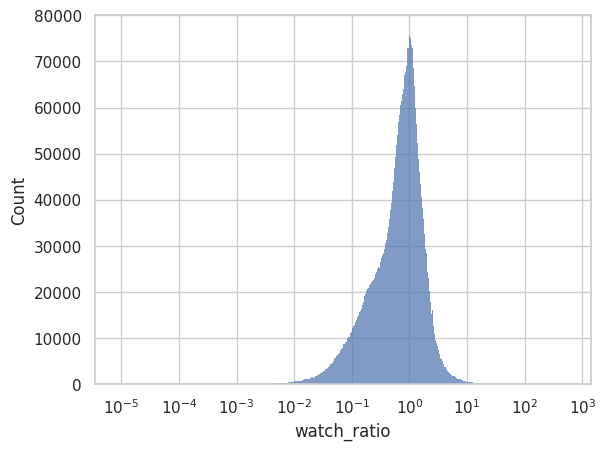

In [76]:
sns.histplot(data=big_matrix, x='watch_ratio', log_scale=True)

# Distribution of videos' mean watch ratio

<Axes: xlabel='watch_ratio', ylabel='Count'>

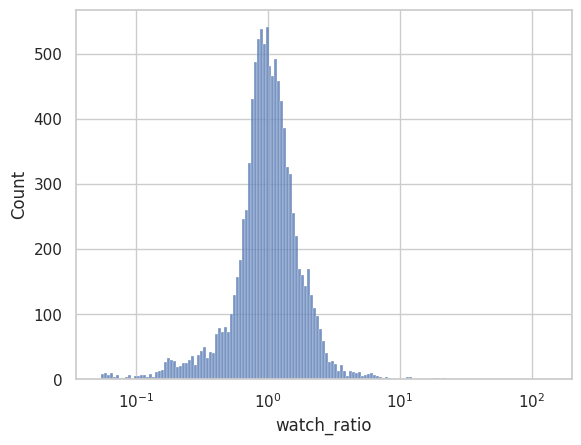

In [75]:
df = big_matrix.groupby(['video_id'])['watch_ratio'].mean()
sns.histplot(data=df, log_scale=True)

# Tags number distribution

<Axes: >

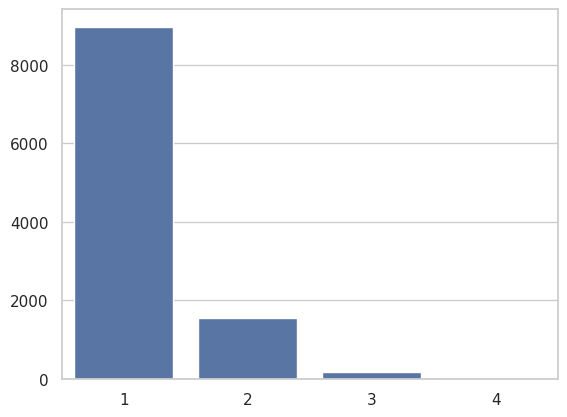

In [74]:
tags, count = np.unique(item_categories['feat'].map(len), return_counts=True)
sns.barplot(x=tags, y=count)

# Friends number distribution

<Axes: >

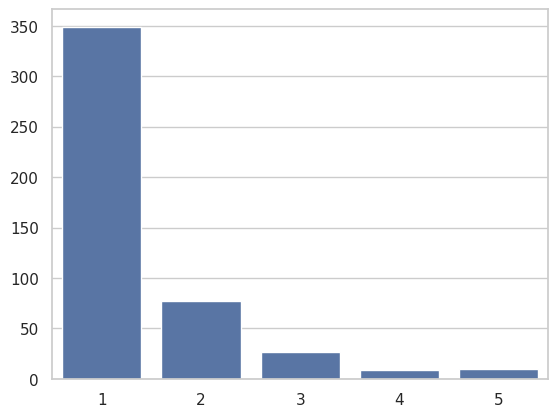

In [73]:
tags, count = np.unique(social_network['friend_list'].map(len), return_counts=True)
sns.barplot(x=tags, y=count)

# Number of videos by tag

<Axes: >

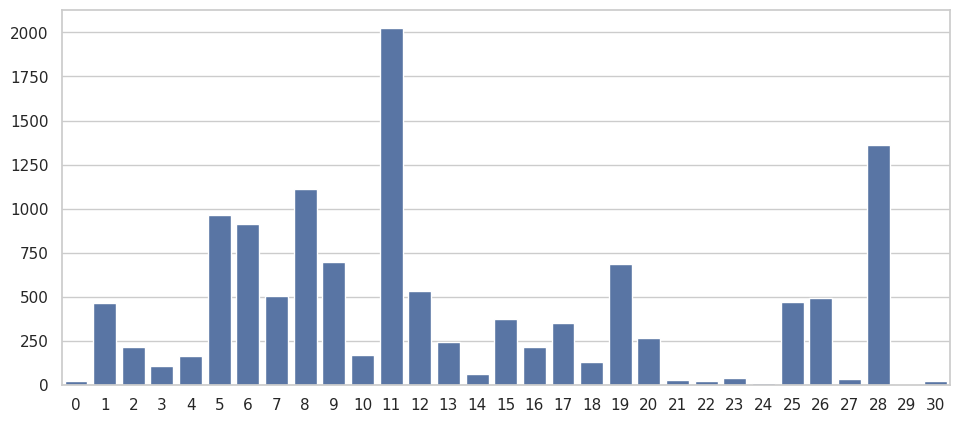

In [72]:
tags = {}
num, cnt = np.unique(np.concat(item_categories['feat'].values), return_counts=True)
tags = dict(zip(num, cnt))
ax = plt.figure(figsize=(12, 5)).add_axes([0.14, 0.15, 0.74, 0.75])
sns.barplot(x=tags.keys(), y=tags.values(), ax=ax)

# Encrypted features distributions

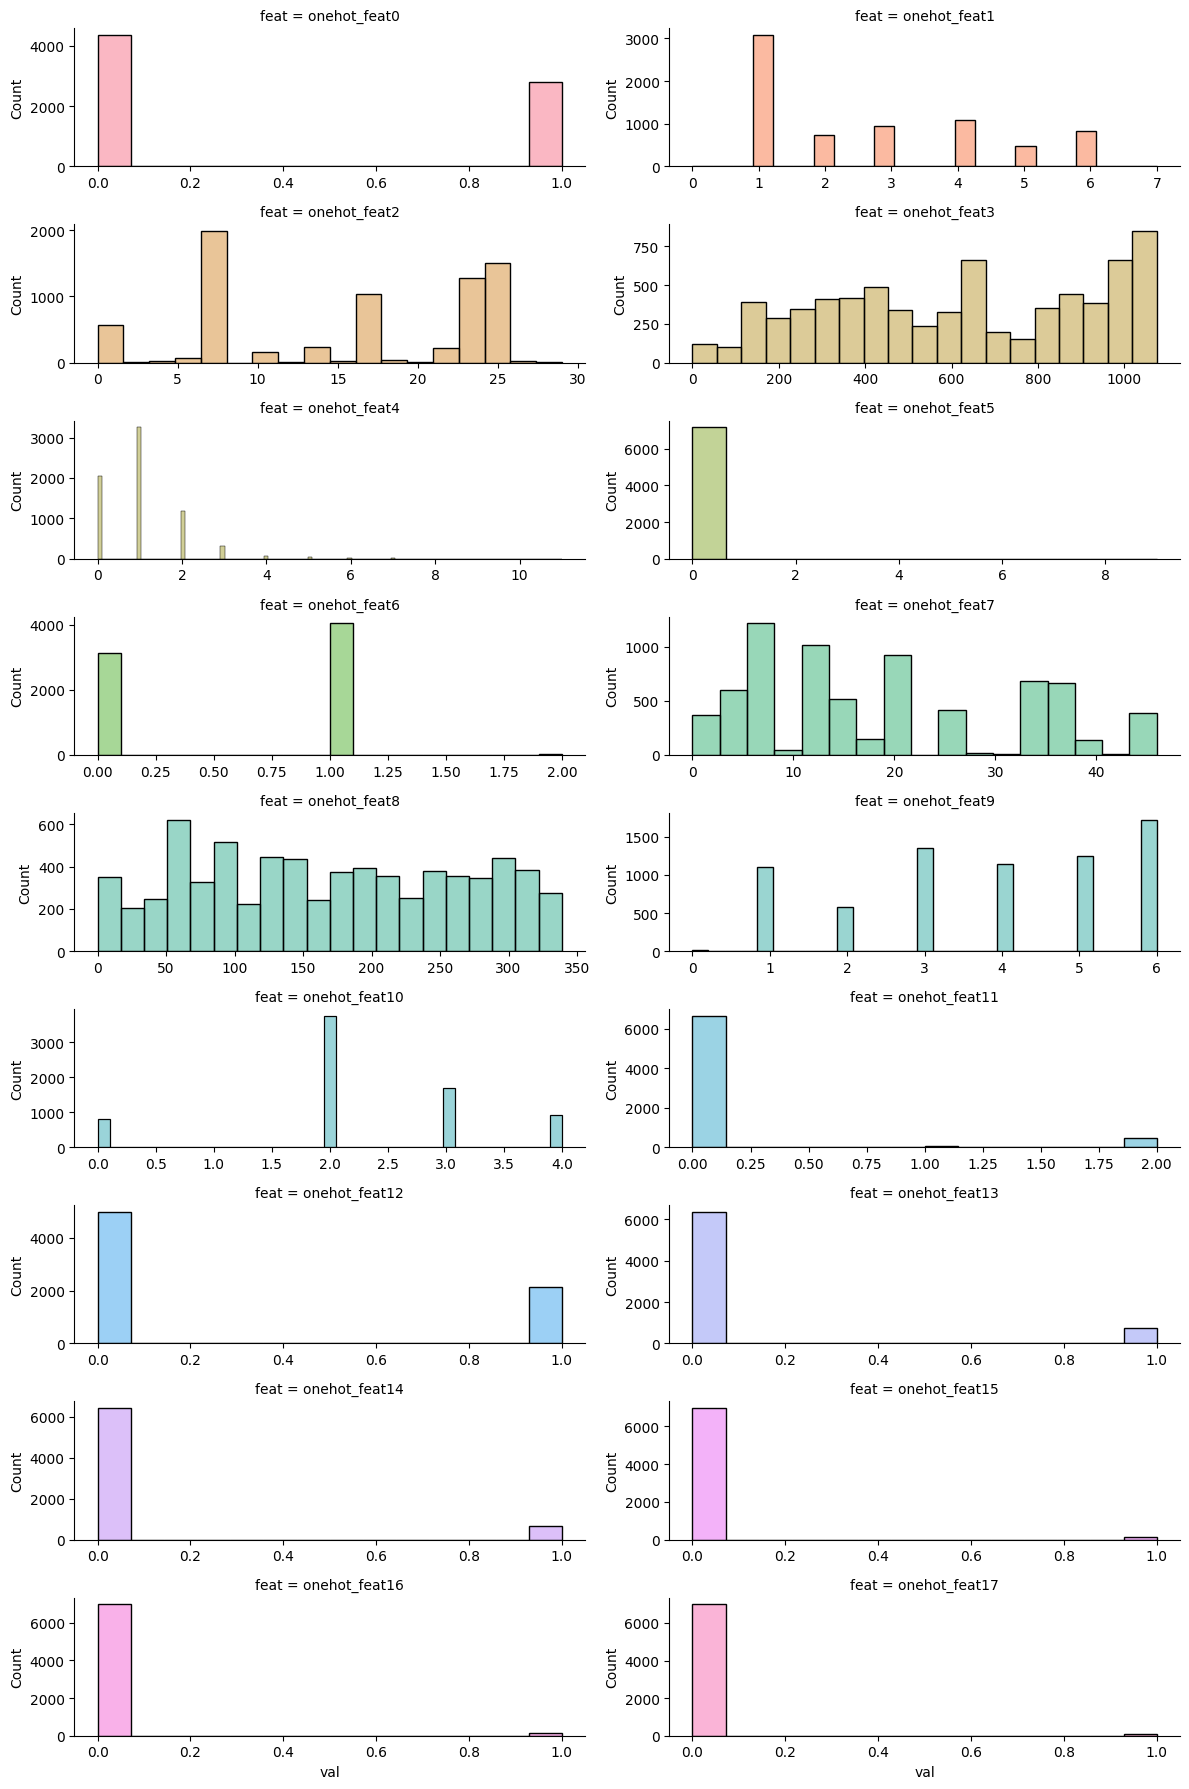

In [20]:
one_hot_cols = [col for col in user_features.columns if 'onehot' in col]
df = user_features[one_hot_cols].melt(var_name='feat', value_name='val')
df['val'] = df['val'].dropna().astype(int)
grid = sns.FacetGrid(df, col='feat', col_wrap=2, sharex=False, sharey=False, height=2, aspect=3)
grid.map(sns.histplot, 'val', data=df, hue='feat')

We can see that some of these categorical features (onehot_feat5 for example) are heavily imbalanced and thus will not be very useful for creating a generalized user representation.

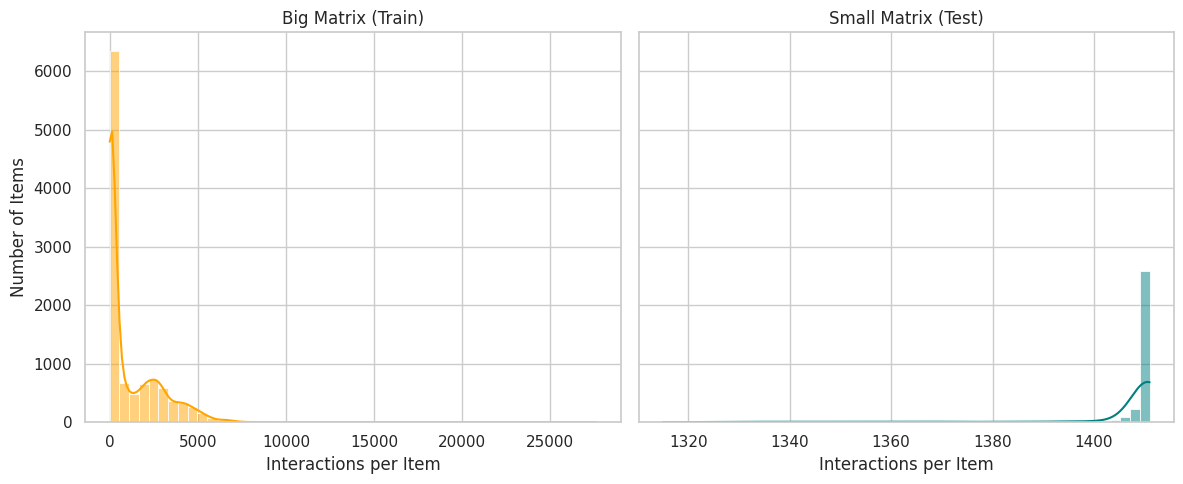

In [67]:
item_inter_counts_b = bdf.groupby('video_id').size()
item_inter_counts_s = sdf.groupby('video_id').size()

# Set up the side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Big matrix (train)
sns.histplot(item_inter_counts_b, bins=50, kde=True, color='orange', ax=axes[0])
axes[0].set_title("Big Matrix (Train)")
axes[0].set_xlabel("Interactions per Item")
axes[0].set_ylabel("Number of Items")

# Small matrix (test)
sns.histplot(item_inter_counts_s, bins=50, kde=True, color='teal', ax=axes[1])
axes[1].set_title("Small Matrix (Test)")
axes[1].set_xlabel("Interactions per Item")
axes[1].set_ylabel("")  # Let the left plot show y-axis

plt.tight_layout()
plt.show()

# VAE

In [22]:
seed = 42

bdf = big_matrix
sdf = small_matrix
user_feats_df = user_features


Create an intercatoin matrix, we will use the big matrix for training and small matrix for testing

In [23]:
from sklearn.preprocessing import normalize

def prepare_data(df):
    vids = np.unique(df['video_id'].values)
    num_videos = len(vids)
    uids = np.unique(df['user_id'].values)
    num_users = len(uids)

    uid2ix = {uid: ix for ix, uid in enumerate(uids)}
    vid2ix = {vid: ix for ix, vid in enumerate(vids)}

    df['user_ix'] = df['user_id'].map(uid2ix)
    df['video_ix'] = df['video_id'].map(vid2ix)

    agg = df.groupby(['user_ix', 'video_ix'])['watch_ratio'].mean().reset_index()

    in_mat = np.zeros((len(uids), len(vids)), dtype=np.float32)

    in_mat[agg['user_ix'], agg['video_ix']] = agg['watch_ratio']

    in_mat = normalize(in_mat, norm='l2')

    return (num_users, uid2ix), (num_videos, vid2ix), in_mat

In [26]:
(s_nu, s_u2x), (s_nv, s_v2x), s_int = prepare_data(sdf)
(b_nu, b_u2x), (b_nv, b_v2x), b_int = prepare_data(bdf)

test_mat = np.zeros_like(b_int)
train_mat = b_int
for i in list(s_u2x):
    for j in list(s_v2x):
        if i >= test_mat.shape[0] or j >= test_mat.shape[1]:
            continue
        test_mat[i, j] = s_int[s_u2x[i], s_v2x[j]]

user_feats = user_feats_df[['onehot_feat{}'.format(f) for f in range(13) if f not in [5, 4, 11]]]
user_feats = normalize(user_feats, norm='l2')
num_user_feats = user_feats.shape[1]

train_mat = np.hstack([train_mat, user_feats])
print('user features shape: {}'.format(user_feats.shape))
print('train matrix shape: {}'.format(train_mat.shape))
print('test matrix shape: {}'.format(test_mat.shape))

user features shape: (7176, 9)
train matrix shape: (7176, 10737)
test matrix shape: (7176, 10728)


### Interaction matrix sparsity

=== Big Matrix (Train) ===
Users: 7176, Items: 10728
Interactions: 10207531, Sparsity: 0.8674

=== Small Matrix (Test) ===
Users: 1411, Items: 3327
Interactions: 4646258, Sparsity: 0.0103


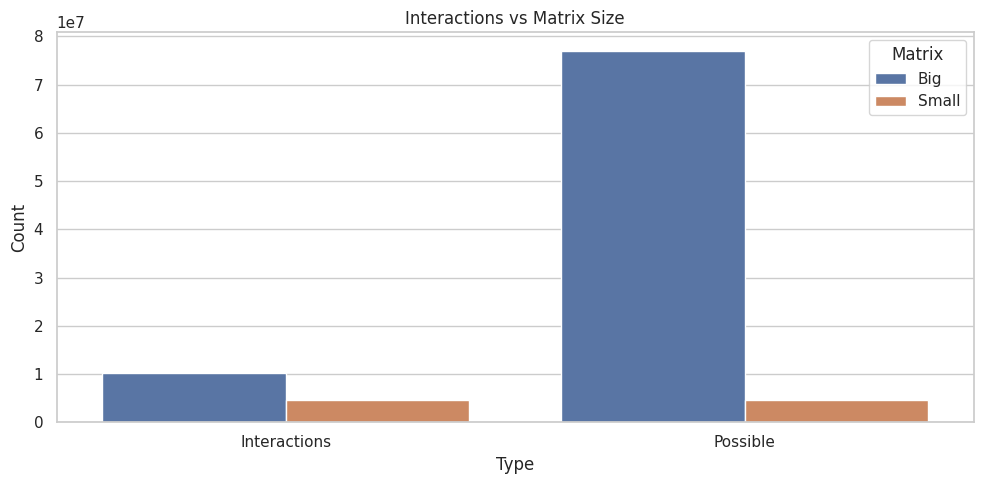

In [65]:
# Big matrix (train)
num_users_b, num_items_b = b_int.shape
num_interactions_b = np.count_nonzero(b_int)
sparsity_b = 1.0 - (num_interactions_b / (num_users_b * num_items_b))

# Small matrix (test)
num_users_s, num_items_s = s_int.shape
num_interactions_s = np.count_nonzero(s_int)
sparsity_s = 1.0 - (num_interactions_s / (num_users_s * num_items_s))

# Print stats
print(f"=== Big Matrix (Train) ===")
print(f"Users: {num_users_b}, Items: {num_items_b}")
print(f"Interactions: {num_interactions_b}, Sparsity: {sparsity_b:.4f}")

print(f"\n=== Small Matrix (Test) ===")
print(f"Users: {num_users_s}, Items: {num_items_s}")
print(f"Interactions: {num_interactions_s}, Sparsity: {sparsity_s:.4f}")

# Plot side by side
# Create data
data = pd.DataFrame({
    "Matrix": ["Big", "Big", "Small", "Small"],
    "Type": ["Interactions", "Possible", "Interactions", "Possible"],
    "Count": [
        num_interactions_b, num_users_b * num_items_b,
        num_interactions_s, num_users_s * num_items_s
    ]
})

# Plot side by side using hue and columns
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="Type", y="Count", hue="Matrix")
plt.title("Interactions vs Matrix Size")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

The VAE consists of:
- Encoder: Transforms input vectors (interactions + user features) into a distribution over latent variables (z_mean, z_log_var).
- Sampling Layer: Samples from the latent space using the reparameterization trick.
- Decoder: Reconstructs the original interaction vector from the sampled latent variable z.

Why a VAE?
- Handles uncertainty by modeling distributions.
- Introduces regularization via KL-divergence, reducing overfitting.
- Captures complex nonlinear relationships in user-item space.

The model is trained with the following losses:
- Reconstruction loss (MSE): Measures how well the decoder reconstructs interactions.
- KL divergence: Keeps the latent space close to a standard normal distribution.

#### The total loss is: 
$$
\mathcal{L}_{\text{VAE}} = \frac{1}{N} \sum_{i=1}^{N} \left[ \| x_i - \hat{x}_i \|^2 + \frac{1}{2} \sum_{j=1}^{d} \left( \mu_{ij}^2 + \sigma_{ij}^2 - \log \sigma_{ij}^2 - 1 \right) \right]
$$

#### Where:
- $N$: Number of users (samples).  
- $d$: Dimensionality of the latent space.  
- $x_i$: Original interaction vector for user $i$.  
- $\hat{x}_i$: Reconstructed interaction vector for user $i$.  
- $\mu_{ij}$: Mean of the $j$-th latent variable for user $i$.  
- $\sigma_{ij}$: Standard deviation of the $j$-th latent variable for user $i$.  
- $\| x_i - \hat{x}_i \|^2$: Mean squared reconstruction error.  
- $\log \sigma_{ij}^2$: Log variance of the latent distribution.

In [27]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.losses import binary_crossentropy
from keras import ops
import keras

latent_dim = 64
num_items = b_nv

class Sampling(Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon
        

encoder_inputs = Input(shape=(num_items + num_user_feats,))
x = Dense(200, activation="relu")(encoder_inputs)
z_mean = Dense(latent_dim, name="z_mean")(x)
z_log_var = Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

latent_inputs = Input(shape=(latent_dim,))
decoder_h = Dense(200, activation='tanh')(latent_inputs)
decoder_outputs = Dense(num_items, activation='sigmoid')(decoder_h)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)

            interactions = data[:, :num_items]
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.mean_squared_error(interactions, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - ops.square(z_mean) - ops.exp(z_log_var))
            kl_loss = ops.mean(ops.sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

2025-05-17 17:37:37.838000: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-17 17:37:37.928013: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747496257.958859    2480 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747496257.968861    2480 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747496258.047188    2480 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10737)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 200)       │  2,147,600 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_mean (Dense)      │ (None, 64)        │     12,864 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ z_log_var (Dense)   │ (None, 64)        │     12,864 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sampling (Sampling) │ (None, 64)        │          0 │ z_mean[0][0],     │
│                     │                   │            │ z_log_var[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,173,328 (8.29 MB)

 Trainable params: 2,173,328 (8.29 MB)

 Non-trainable params: 0 (0.00 B)

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │        13,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10728)          │     2,156,328 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,169,328 (8.28 MB)

 Trainable params: 2,169,328 (8.28 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=tf.keras.optimizers.Adam(0.01))
history = vae.fit(train_mat, epochs=20, batch_size=128)

Epoch 1/20


I0000 00:00:1747496595.590163    3939 service.cc:152] XLA service 0x779fe000afb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747496595.590177    3939 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2025-05-17 17:43:15.622074: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1747496595.738118    3939 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-17 17:43:16.562433: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_328', 252 bytes spill stores, 252 bytes spill loads

2025-05-17 17:43:16.953938: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1

56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 0.0729 - loss: 0.2305 - reconstruction_loss: 0.1576

I0000 00:00:1747496599.654922    3939 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-05-17 17:43:21.395736: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_328', 768 bytes spill stores, 768 bytes spill loads

2025-05-17 17:43:21.539296: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_650', 4 bytes spill stores, 4 bytes spill loads



57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - kl_loss: 0.0712 - loss: 0.2259 - reconstruction_loss: 0.1547
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 8.8161e-05 - loss: 2.2548e-04 - reconstruction_loss: 1.3732e-04
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - kl_loss: 4.1237e-07 - loss: 9.2002e-05 - reconstruction_loss: 9.1589e-05
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 9.8602e-08 - loss: 9.0507e-05 - reconstruction_loss: 9.0408e-05
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: -3.8447e-08 - loss: 8.8878e-05 - reconstruction_loss: 8.8917e-05
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 1.6043e-07 - loss: 8.8464e-05 - reconstruction_loss: 8.8303e-05
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: 5.1557e-08 - loss: 8.7614e-05 - reconstruction_loss: 8.7563e-05
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - kl_loss: -1.4796e-07 - loss: 8.6693e-05 - reconstruction_loss: 8.6841e-05
Epoch 9/20
57/57 ━━━

***Precision@k***: How many of the top-k recommended items are relevant?

***Recall@k***: What fraction of all relevant items were recommended?

***nDCG@k***: Gives higher weight to relevant items ranked earlier.

***MAP@k***: Mean of Average Precision across users.

In [53]:

def get_top_k(preds, k):
    return np.argsort(preds, axis=1)[:, ::-1][:, :k]

def recall_at_k(preds, test, k=10):
    top_k = get_top_k(preds, k)
    recall_scores = []
    for i in range(preds.shape[0]):
        true_items = test[i].nonzero()[0]
        if len(true_items) == 0:
            continue
        hits = np.intersect1d(top_k[i], true_items).size
        recall_scores.append(hits / len(true_items))
    return np.mean(recall_scores)

def precision_at_k(preds, test, k=10):
    top_k = get_top_k(preds, k)
    precision_scores = []
    for i in range(preds.shape[0]):
        true_items = test[i].nonzero()[0]
        if len(true_items) == 0:
            continue
        hits = np.intersect1d(top_k[i], true_items).size
        precision_scores.append(hits / k)
    return np.mean(precision_scores)

def dcg_at_k(ranked_list, true_items, k):
    dcg = 0.0
    for i in range(k):
        if ranked_list[i] in true_items:
            dcg += 1.0 / np.log2(i + 2)
    return dcg

def ndcg_at_k(preds, test, k=10):
    top_k = get_top_k(preds, k)
    ndcg_scores = []
    for i in range(preds.shape[0]):
        true_items = test[i].nonzero()[0]
        if len(true_items) == 0:
            continue
        dcg = dcg_at_k(top_k[i], true_items, k)
        ideal_dcg = dcg_at_k(true_items[:k], true_items, k)
        if ideal_dcg == 0:
            continue
        ndcg_scores.append(dcg / ideal_dcg)
    return np.mean(ndcg_scores)

def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]
    score = 0.0
    hits = 0
    for i, p in enumerate(predicted):
        if p in actual:
            hits += 1
            score += hits / (i + 1.0)
    return score / min(len(actual), k) if len(actual) > 0 else 0.0

def map_at_k(preds, test, k=10):
    top_k = get_top_k(preds, k)
    apk_scores = []
    for i in range(preds.shape[0]):
        true_items = test[i].nonzero()[0]
        if len(true_items) == 0:
            continue
        apk_scores.append(apk(true_items, top_k[i], k))
    return np.mean(apk_scores)

def print_stats(preds, test, k):
    print('==== k = {} ===='.format(k))
    print(f"Recall@10:   {recall_at_k(preds, test, k):.4f}")
    print(f"Precision@10:{precision_at_k(preds, test, k):.4f}")
    print(f"nDCG@10:     {ndcg_at_k(preds, test, k):.4f}")
    print(f"MAP@10:      {map_at_k(preds, test, k):.4f}")

Mask already-seen interactions in predictions to avoid recommending items the user already interacted with.

In [ ]:
z_mean, z_log_var, z = vae.encoder.predict(train_mat, verbose=0)
preds = vae.decoder.predict(z, verbose=0)
masked_preds = preds * (train_mat[:, :num_items] == 0)

In [52]:
print_stats(masked_preds, test_mat, 5)
print_stats(masked_preds, test_mat, 10)
print_stats(masked_preds, test_mat, 20)
print_stats(masked_preds, test_mat, 50)
print_stats(masked_preds, test_mat, 100)

==== k = 5 ====
Recall@10:   0.0011
Precision@10:0.7283
nDCG@10:     0.7311
MAP@10:      0.6206
==== k = 10 ====
Recall@10:   0.0023
Precision@10:0.7717
nDCG@10:     0.7598
MAP@10:      0.6293
==== k = 20 ====
Recall@10:   0.0049
Precision@10:0.8072
nDCG@10:     0.7892
MAP@10:      0.6554
==== k = 50 ====
Recall@10:   0.0130
Precision@10:0.8582
nDCG@10:     0.8354
MAP@10:      0.7132
==== k = 100 ====
Recall@10:   0.0270
Precision@10:0.8887
nDCG@10:     0.8672
MAP@10:      0.7593


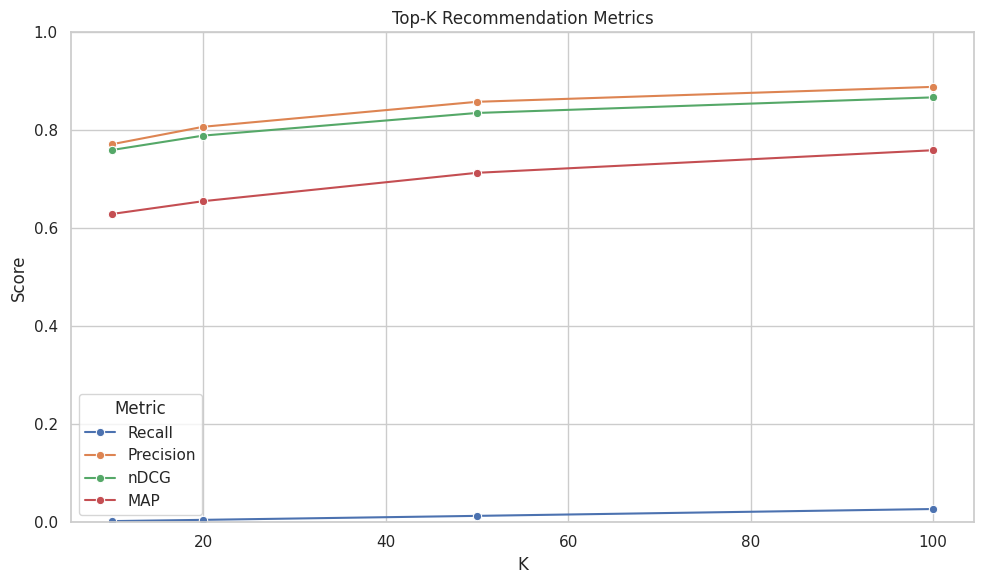

In [54]:
ks = [10, 20, 50, 100]
recalls = [recall_at_k(masked_preds, test_mat, k) for k in ks]
precisions = [precision_at_k(masked_preds, test_mat, k) for k in ks]
ndcgs = [ndcg_at_k(masked_preds, test_mat, k) for k in ks]
maps = [map_at_k(masked_preds, test_mat, k) for k in ks]

metrics_df = pd.DataFrame({
    'k': ks * 4,
    'metric': ['Recall'] * len(ks) + ['Precision'] * len(ks) + ['nDCG'] * len(ks) + ['MAP'] * len(ks),
    'score': recalls + precisions + ndcgs + maps
})

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=metrics_df, x='k', y='score', hue='metric', marker='o')
plt.title("Top-K Recommendation Metrics")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step


Text(0.5, 1.0, 'Latent User Embeddings')

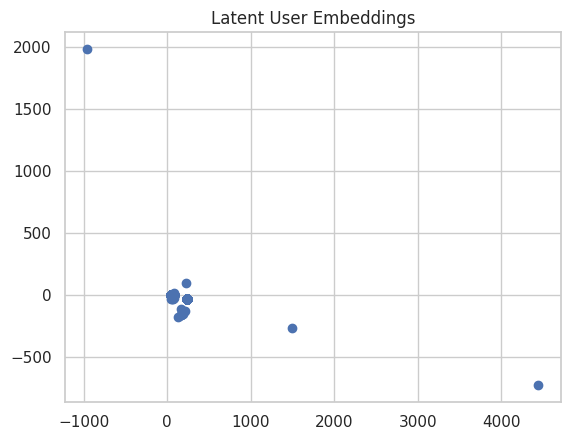

In [55]:
from sklearn.manifold import TSNE
z_mean = vae.encoder.predict(train_mat)[0]
z_proj = TSNE(n_components=2).fit_transform(z_mean)
plt.scatter(z_proj[:, 0], z_proj[:, 1])
plt.title("Latent User Embeddings")

In [46]:
vids = np.unique(bdf['video_id'].values)

def recommend_for_user(user_id, interaction_matrix, user_features, encoder, decoder, top_k=10):
    user_interactions = interaction_matrix[user_id].reshape(1, -1)  # shape: (1, num_items)
    user_features = user_features[user_id].reshape(1, -1)
    inputs = np.hstack([user_interactions, user_features])
    
    _, _, z = encoder.predict(inputs, verbose=0)
    item_scores = decoder.predict(z, verbose=0).flatten()
    
    seen_items = set(np.where(interaction_matrix[user_id] > 0)[0])
    item_scores[list(seen_items)] = -np.inf
    
    recs = np.argpartition(-item_scores, top_k)[:top_k]
    recs = recs[np.argsort(-item_scores[recs])]

    return vids[recs]

In [49]:
test_uid = 5733
recommend_for_user(test_uid, b_int, user_feats, encoder, decoder, 10)

array([ 2687,  3854,   339,  5995,  1871,   154,  4349, 10017,  8389,
        5066])